# Exploratory Data Analysis

In [1]:
#First our imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

brass = pd.read_csv('../data/brass_churn.csv')
min_diff = pd.read_csv('../data/min_diff.csv')

In [2]:
brass.head(3)

,id,registration_type,industry,transaction_type,amount,ledger_balance,available_balance,date,difference,churn
0,21,Enterprise,General Services,credit,100.0,0.0,0.0,2022-07-16,169,0
1,21,Enterprise,General Services,debit,100.0,100.0,0.0,2022-07-17,168,0
2,122,Limited Liability,Technology,debit,12000.0,20000.0,20000.0,2022-04-15,261,1


In [3]:
min_diff.head(3)

,id,registration_type,industry,transaction_type,amount,ledger_balance,available_balance,date,difference,churn
0,21,Enterprise,General Services,credit,100.00,0.0,0.0,2022-07-16,168,0
1,122,Limited Liability,Technology,credit,12000.00,0.0,0.0,2022-04-15,261,1
2,159,Sole Proprietorship,Technology,credit,26.88,0.0,0.0,2022-05-05,11,0


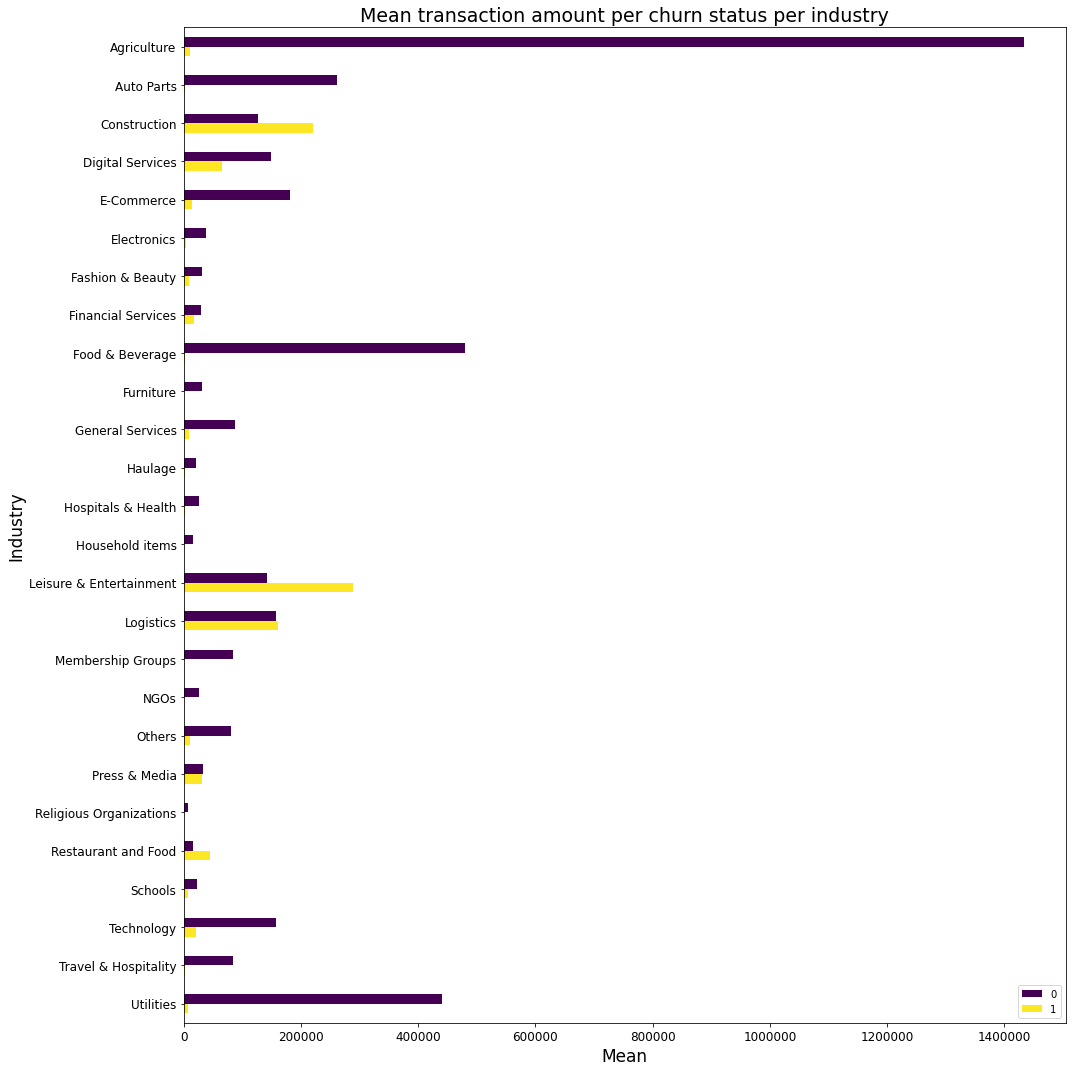

In [4]:
brass_balance = brass.pivot_table(values = 'amount', index='industry', columns='churn', aggfunc='mean').sort_values(by='industry') #default is mean so we could have skipped that

p = brass_balance.plot(kind='barh', fontsize=12, legend=False, figsize=(15,15), colormap='viridis');
p.set_xlabel('Mean', size=17)
p.set_ylabel('Industry', size=17)
plt.title('Mean transaction amount per churn status per industry', size=19)
plt.ticklabel_format(axis='x', style='plain')
p.invert_yaxis()
plt.legend()

plt.tight_layout()
plt.savefig('../images/mean_trans_amnt.png', dpi=300);

In a few industries like construction, leisure&entertainment, logistics and restaurant & food, the mean transaction amount for customers who had churned was higher than that for customers who had not churned. For all the other industries, it was the reverse. I'll do the same below for the `registration types` and then I'll look at a chart that shows number of customers per registration type to see if I can spot anything.

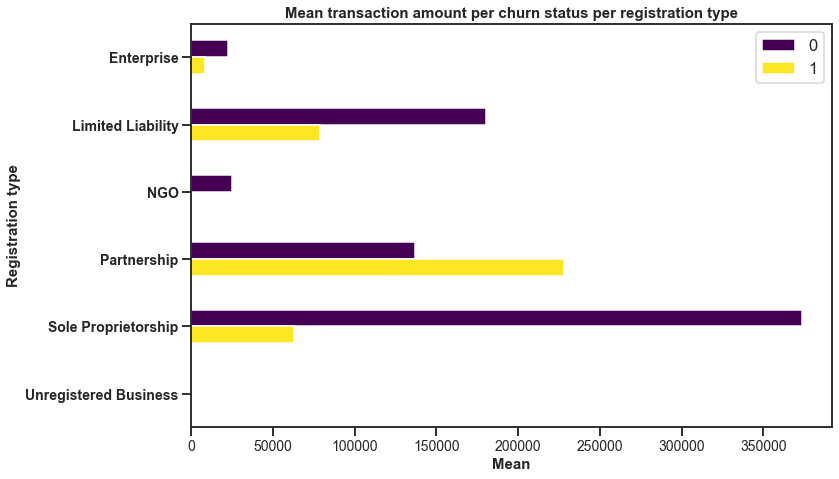

In [17]:
brass_balance = brass.pivot_table(values = 'amount', index='registration_type', columns='churn', aggfunc='mean').sort_values(by='registration_type') #default is mean so we could have skipped that
#x = brass['churn'].map({0: 'not churn', 1: 'churn'})
p = brass_balance.plot(kind='barh', fontsize=12, legend=False, figsize=(12,7), colormap='viridis');
p.set_xlabel('Mean', size=15, fontweight='bold')
p.set_ylabel('Registration type', size=15, fontweight='bold')
plt.title('Mean transaction amount per churn status per registration type', size=15, fontweight='bold')
plt.ticklabel_format(axis='x', style='plain')
p.invert_yaxis()
plt.yticks(fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig('../images/mean_reg_trans_amnt.png', dpi=300);

Now let's plot for number of customers per registration type.

In [6]:
pd.DataFrame(min_diff.groupby('registration_type')['churn'].value_counts())

churn
registration_type     churn       
Enterprise            0        597
                      1        189
Limited Liability     0        307
                      1         59
NGO                   0          6
Partnership           0         32
                      1         10
Sole Proprietorship   0        236
                      1         56
Unregistered Business 0          1

In [7]:
#I am going to make a dataframe of the above information because the multiindex makes it hard to plot from above
data = pd.DataFrame(
    {'Type of Registration': ['Enterprise', 'Limited Liability', 'NGO', 'Partnership', 'Sole Proprietorship', 'Unregistered Business'],
     'Not-Churn': [597, 307, 6, 32, 236, 1],
     'Churn': [189, 59, 0, 10, 56, 0]})

data

,Type of Registration,Not-Churn,Churn
0,Enterprise,597,189
1,Limited Liability,307,59
2,NGO,6,0
3,Partnership,32,10
4,Sole Proprietorship,236,56
5,Unregistered Business,1,0


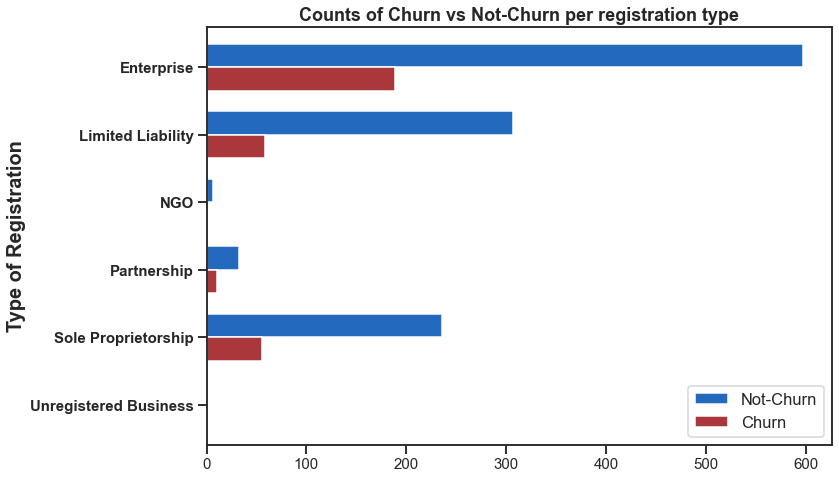

In [8]:
sns.set_theme(rc={'figure.figsize': (12,7)}, style='ticks', context='talk')

p = data.plot(x = 'Type of Registration',
                   kind='barh', 
                   stacked=False, 
                   figsize=(12, 7), 
                   fontsize=15, width = 0.7, colormap = 'vlag')

p.invert_yaxis()
plt.legend(loc='lower right')
plt.title('Counts of Churn vs Not-Churn per registration type', size=18, fontweight='bold')
plt.ylabel('Type of Registration', size=20, fontweight='bold'),
plt.yticks(fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('../images/churn_per_registration', dpi=300);

I am not gleaning much from these two comparisons apart from fact that even though there are more enterprise accounts as seen in the chart above, their mean transaction amount pales in comparison to some others like sole proprietorship, limited liability and partnership. 

Also, for partnerships, the mean transaction amount for churned accounts is higher than for non churned accounts. It is the only registration type where this is observed. 

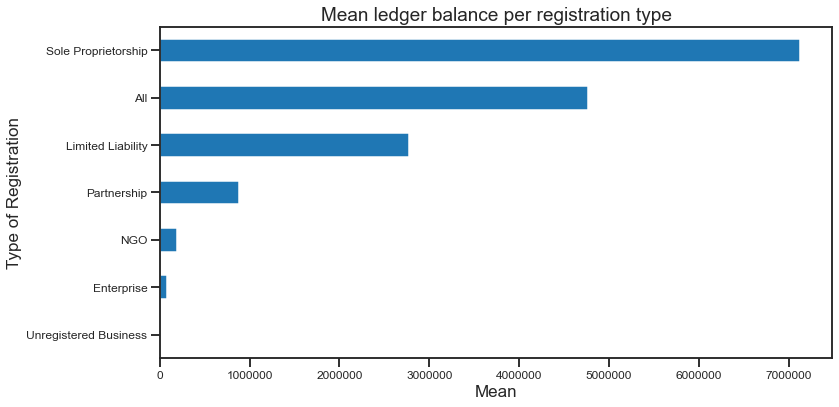

In [9]:
reg_balance = brass.pivot_table(values = 'ledger_balance', index='registration_type', aggfunc='mean', margins=True).sort_values(by='ledger_balance', ascending=True)

p = reg_balance.plot(kind='barh', title='Mean ledger balance per registration type', fontsize=12, legend=False, figsize=(12,6), color='tab:blue');
p.set_xlabel('Mean', size=17)
p.set_ylabel('Type of Registration', size=17)
plt.title('Mean ledger balance per registration type', size=19)
plt.ticklabel_format(axis='x', style='plain')

plt.tight_layout()
plt.savefig('../images/mean_reg_ledger_balance.png', dpi=300);

## Grouped frequency table 
The below grouped frequency table shows the distribution of transaction amounts throughtout the year. We see that the overwhelming majority of transactions in Brass are 10_000_000 naira or less. There are only slightly more than 500 transactions in the whole year that involve amounts greater than 10_000_000.  

In [11]:
brass['amount'].value_counts(bins=10)

(-100000.001, 10000000.0]    298365
(10000000.0, 20000000.0]        232
(20000000.0, 30000000.0]        130
(30000000.0, 40000000.0]         68
(40000000.0, 50000000.0]         39
(50000000.0, 60000000.0]         18
(60000000.0, 70000000.0]         16
(90000000.0, 100000000.0]        12
(70000000.0, 80000000.0]         11
(80000000.0, 90000000.0]         11
Name: amount, dtype: int64

## Comparing counts of credit and debit transactions

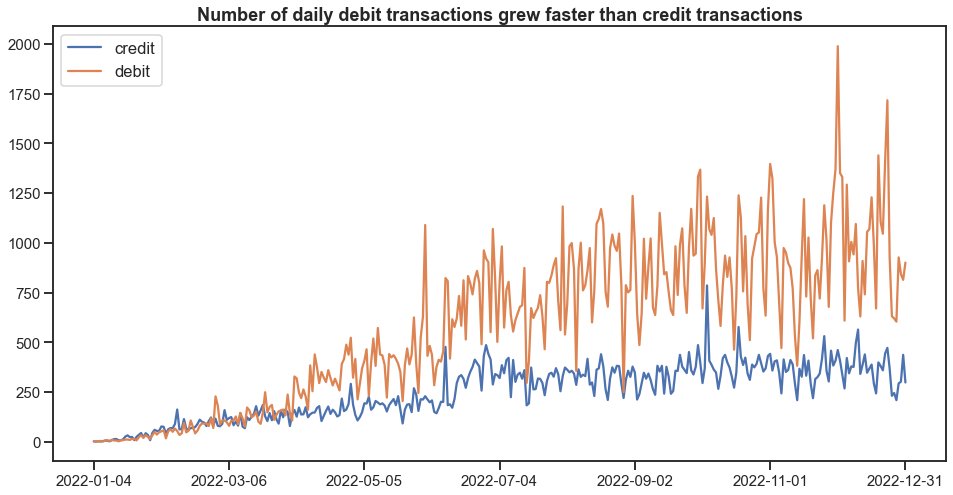

In [12]:
plt.figure(figsize = (16,8))
credit = brass[brass['transaction_type']=='credit'] #credit transactions in the dataset
debit = brass[brass['transaction_type']=='debit'] #debit transactions in the dataset
plt.plot(credit.groupby('date')['amount'].size().index, credit.groupby('date')['amount'].size().values, label='credit') #plotting line graph that shows credit transaction amounts over time
plt.plot(debit.groupby('date')['amount'].size().index, debit.groupby('date')['amount'].size().values, label='debit') #plotting line graph that shows debit transaction amounts over time
plt.xticks(credit.groupby('date')['amount'].size().index[0::60], size=15) #this creates teh steps between the ticks to prevent overcrowding
plt.yticks(size=15)
plt.legend()
plt.title('Number of daily debit transactions grew faster than credit transactions', fontsize=18, fontweight='bold');

The plot above shows that the number of daily debits has grown much quicker than the number of daily credits among Brass customer.

I want to see the change in credit transactions for churned vs non-churned customers. 
I already have a dataframe containing just credit transactions. So I can group that dataframe into churned and not-churned. Then further group by date and aggregate count of transaction amounts. 

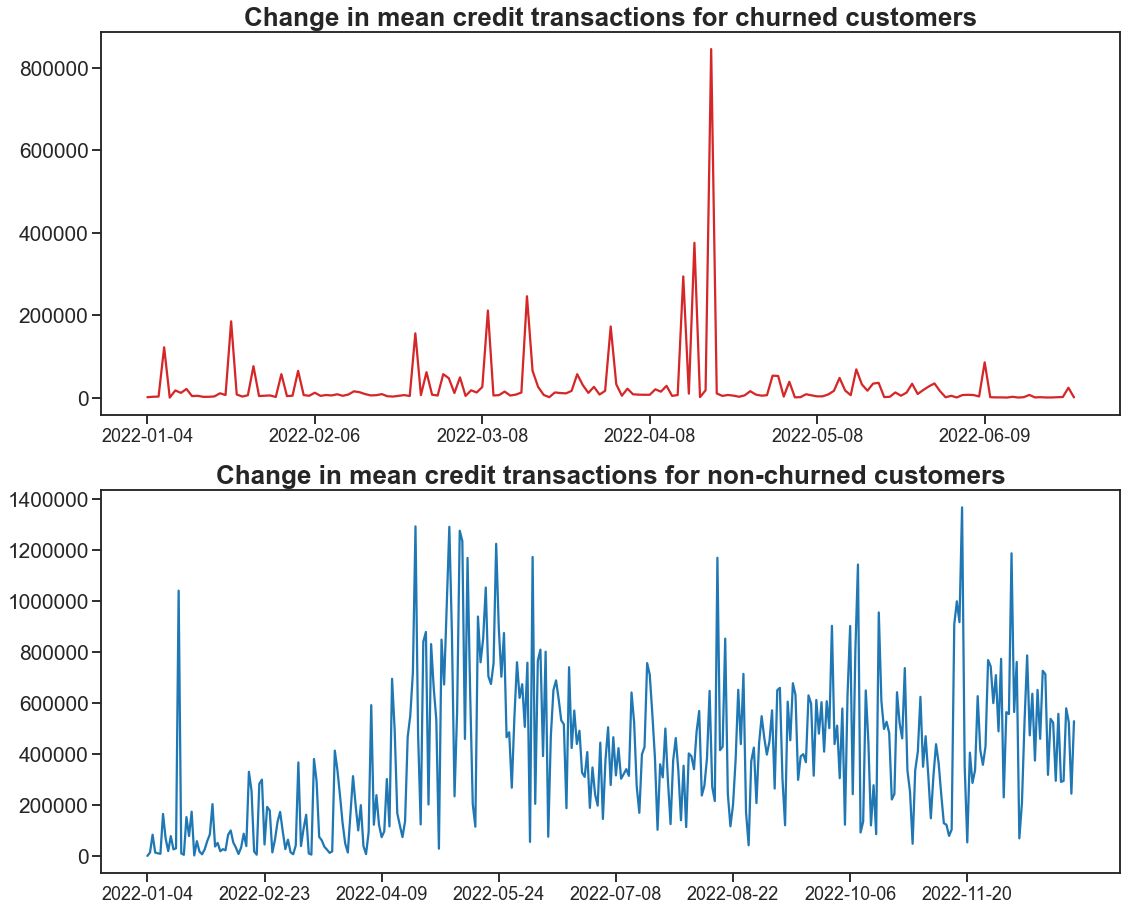

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,13))
churn_credit = credit[credit['churn']==1] #credit transactions by customers who have churned
notchurn_credit = credit[credit['churn']==0] #credit transactions by customers who have not churned
ax1.ticklabel_format(axis='y', style='plain') #so that the axis does not display in scientific notation
ax2.ticklabel_format(axis='y', style='plain')
ax1.plot(churn_credit.groupby('date')['amount'].mean().index, churn_credit.groupby('date')['amount'].mean().values, label='churned customers', color='tab:red') 
ax2.plot(notchurn_credit.groupby('date')['amount'].mean().index, notchurn_credit.groupby('date')['amount'].mean().values, label='not churned customers', color='tab:blue') 
ax1.set_xticks(churn_credit.groupby('date')['amount'].mean().index[0::30])
ax2.set_xticks(notchurn_credit.groupby('date')['amount'].mean().index[0::45])
ax1.set_title('Change in mean credit transactions for churned customers', {'fontsize':26, 'fontweight':'bold'})
ax2.set_title('Change in mean credit transactions for non-churned customers', {'fontsize':26, 'fontweight':'bold'})
ax1.tick_params(axis='y', labelsize=21)
ax2.tick_params(axis='y', labelsize=21)
ax1.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='x', labelsize=18)
plt.tight_layout()
plt.savefig('../images/change_mean_credit.png');

Caveat: 

Please note that neither the x or y axis of the two subplots above are on the same scale. They are on different scales, so consider that in reading or interpreting.

Having said that, it still seems clear that on average, churned customers had lower credit transaction amounts when compared with non-churned customers. 

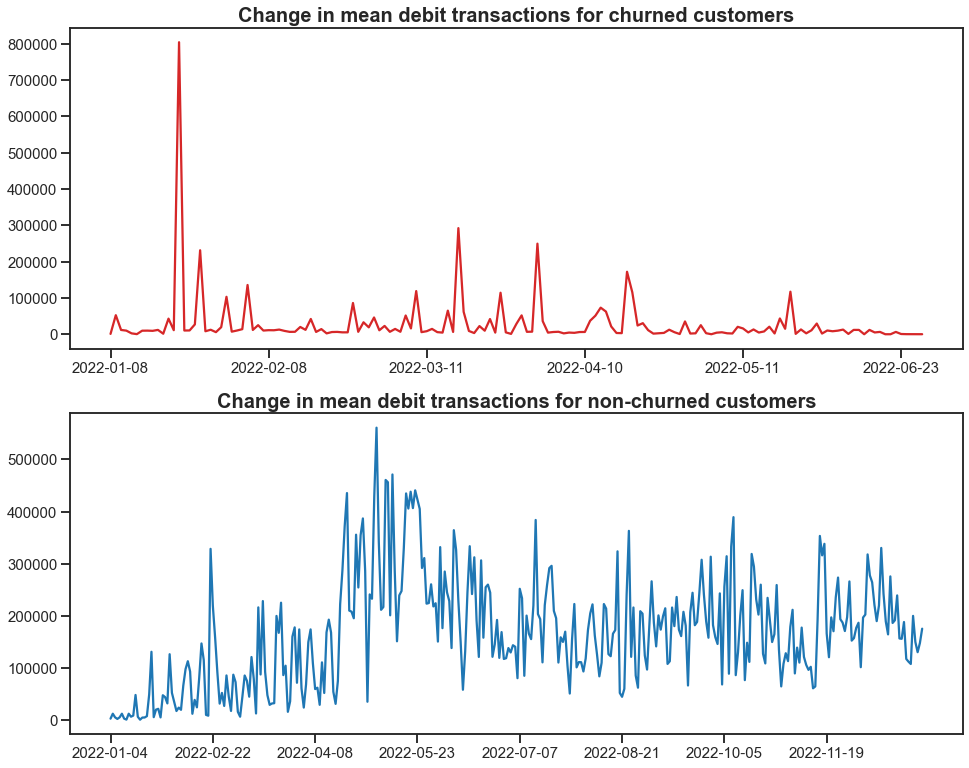

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,13))
churn_debit = debit[debit['churn']==1] #debit transactions by customers who have churned
notchurn_debit = debit[debit['churn']==0] #debit transactions by customers who have not churned
ax1.plot(churn_debit.groupby('date')['amount'].mean().index, churn_debit.groupby('date')['amount'].mean().values, label='churned customers', color='tab:red') 
ax2.plot(notchurn_debit.groupby('date')['amount'].mean().index, notchurn_debit.groupby('date')['amount'].mean().values, label='not churned customers', color='tab:blue') 
ax1.set_xticks(churn_debit.groupby('date')['amount'].mean().index[0::30])
ax2.set_xticks(notchurn_debit.groupby('date')['amount'].mean().index[0::45])
ax1.set_title('Change in mean debit transactions for churned customers', {'fontsize':20, 'fontweight':'bold'})
ax2.set_title('Change in mean debit transactions for non-churned customers', {'fontsize':20, 'fontweight':'bold'})
plt.yticks(size=15)
plt.yticks(size=15)
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
ax1.ticklabel_format(axis='y', style='plain') #so that the axis does not display in scientific notation
ax2.ticklabel_format(axis='y', style='plain')
ax1.ticklabel_format(axis='y', style='plain') #so that the axis does not display in scientific notation
ax2.ticklabel_format(axis='y', style='plain');


Just like with the credit transactions, it seems here again that on average, churned customers had lower debit transaction amounts on average when compared with non-churned customers. 

Unfortunately, the two time series charts i plotted above cannot factor into my model because they are dependent on time/date, and since my definition of churn relied on the `date` feature in my dataset, I cannot engineer new columns that are also dependent on time/date otherwise those features would be indicative of churn.

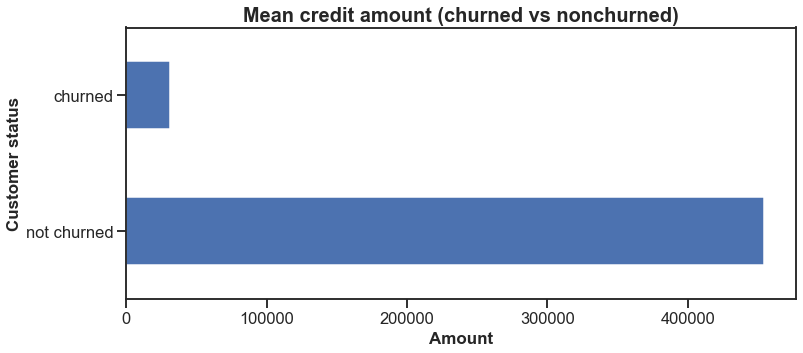

In [15]:
plt.figure(figsize=(12,5))
credit.groupby('churn')['amount'].mean().plot(kind='barh')
plt.yticks([0, 1], ['not churned', 'churned'])
plt.ylabel('Customer status', size=17, fontweight='bold')
plt.xlabel('Amount', size=17, fontweight='bold')
plt.title('Mean credit amount (churned vs nonchurned)', size=20, fontweight='bold');

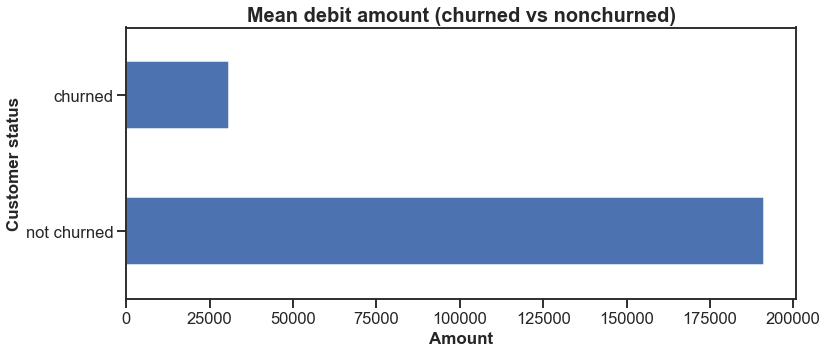

In [16]:
plt.figure(figsize=(12,5))
debit.groupby('churn')['amount'].mean().plot(kind='barh')
plt.yticks([0, 1], ['not churned', 'churned'])
plt.ylabel('Customer status', size=17, fontweight='bold')
plt.xlabel('Amount', size=17, fontweight='bold')
plt.title('Mean debit amount (churned vs nonchurned)', size=20, fontweight='bold');